In [1]:
using Random, Distributions, Plots, PlotThemes, LaTeXStrings
nothing

In [2]:
rng = Xoshiro(9999)

T = 3

grid_exponent = 12
grid_size = 2^grid_exponent+1
grid_step = T/(grid_size-1)

grid = collect(0:grid_step:T)

sample_size = 35

W_sample_paths = Matrix{Float64}(undef, grid_size, sample_size)

dW_sample_paths = Matrix{Float64}(undef, grid_size-1, sample_size)
rand!(rng, Normal(0,sqrt(grid_step)), dW_sample_paths)

W_sample_paths[1, :] = zeros(sample_size)

for i in range(1,grid_size-1)
    W_sample_paths[i+1, :] = W_sample_paths[i, :] + dW_sample_paths[i, :]
end

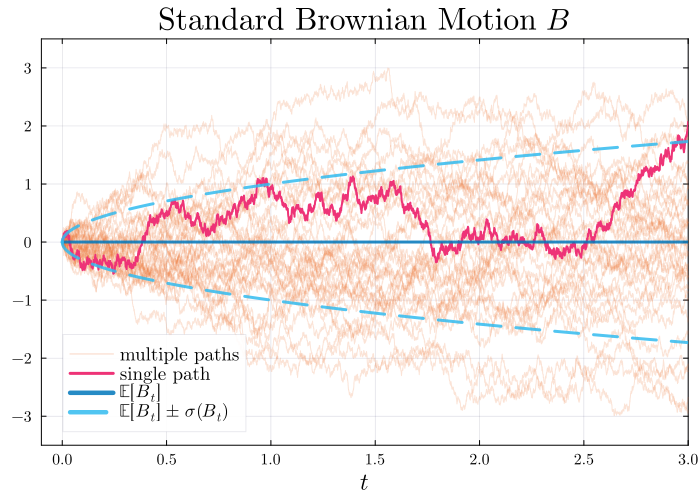

In [4]:
theme(:vibrant)

pl = plot(grid, W_sample_paths, label=permutedims(["multiple paths"; fill(nothing, sample_size-1)]),
    color=1, linewidth=1, alpha=0.2)

plot!(pl, grid, W_sample_paths[:, 1], label="single path", color=:4, linewidth=2)

plot!(pl, grid, zeros(grid_size), label=L"\mathbb{E}[B_t]", color=2, linewidth=3, alpha=0.85)

plot!(pl, grid, sqrt.(grid), label=L"\mathbb{E}[B_t]\pm\sigma\,(\!B_t)", color=3, linestyle=:dash, linewidth=3, alpha=0.85)

plot!(pl, grid, -sqrt.(grid), label="", color=3, linestyle=:dash, linewidth=3, alpha=0.85)

plot!(pl, title="Standard Brownian Motion "*L"B", xlabel=L"t",
    xlim=(-0.1,3), xticks=0:0.5:3, ylim=(-3.5,3.5), yticks=-3:1:3,
    size=(700,500), grid=true, minorgrid=false, framestyle=:box,
    fontfamily="Computer Modern", titlefontsize=20, legendfontsize=12, xlabelfontsize=16,
    xtickfont=font(10, "Computer Modern"), ytickfont=font(10, "Computer Modern"))
    
display(pl)

In [5]:
savefig(pl, "brownian_motion.pdf")

"C:\\Users\\luan_\\OneDrive\\Desktop\\Projeto Mestrado\\9 - Dissertação\\brownian_motion.pdf"

In [6]:
rng = Xoshiro(99)

T = 3

grid_exponent = 12
grid_size = 2^grid_exponent+1
grid_step = T/(grid_size-1)

grid = collect(0:grid_step:T)

sample_size = 25

ν = 1.5
μ = 1
μ₀ = 3
σ = 1

O_sample_paths = Matrix{Float64}(undef, grid_size, sample_size)
dW_sample_paths = Matrix{Float64}(undef, grid_size, sample_size)
rand!(rng, Normal(0,sqrt(grid_step)), dW_sample_paths)

O_sample_paths[1, :] = μ₀ .* ones(sample_size)

for i in range(1,grid_size-1)
    O_sample_paths[i+1, :] = O_sample_paths[i, :] .- ν.*(O_sample_paths[i, :].-μ).*grid_step .+ σ.*dW_sample_paths[i, :]
end

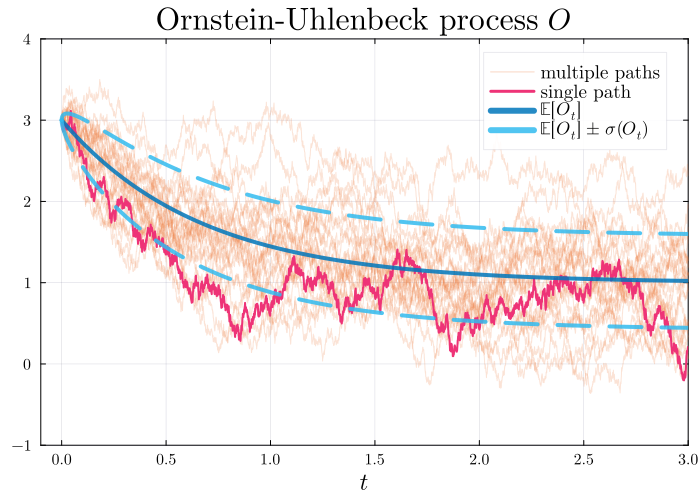

In [8]:
theme(:vibrant)

pl = plot(grid, O_sample_paths, label=permutedims(["multiple paths"; fill(nothing, sample_size-1)]),
    color=1, linewidth=1, alpha=0.2)

plot!(pl, grid, O_sample_paths[:, 1], label="single path", color=:4, linewidth=2)

mean = μ .+ (μ₀ - μ) .* exp.(-ν.*grid)
std_dev = sqrt.((σ^2/(2*ν)) .* (1 .- exp.(-2 .*ν.*grid)))

plot!(pl, grid, mean, label=L"\mathbb{E}[O_t]", color=2, linewidth=4, alpha=0.85)

plot!(pl, grid, mean .+ std_dev, label=L"\mathbb{E}[O_t]\pm\sigma\,(\!O_t)",
    color=3, linestyle=:dash, linewidth=4, alpha=0.85)

plot!(pl, grid, mean .- std_dev, label="", color=3, linestyle=:dash, linewidth=4, alpha=0.85)

plot!(pl, title="Ornstein-Uhlenbeck process "*L"O", xlabel=L"t",
    xlim=(-0.1,3), xticks=0:0.5:3, ylim=(-1,4), yticks=-3:1:4,
    size=(700,500), grid=true, minorgrid=false, framestyle=:box,
    fontfamily="Computer Modern", titlefontsize=20, legendfontsize=12, xlabelfontsize=16,
    xtickfont=font(10, "Computer Modern"), ytickfont=font(10, "Computer Modern"))
    
display(pl)

In [9]:
savefig(pl, "ornstein_uhlenbeck.pdf")

"C:\\Users\\luan_\\OneDrive\\Desktop\\Projeto Mestrado\\9 - Dissertação\\ornstein_uhlenbeck.pdf"